In [77]:
from copy import deepcopy

#Based on Mesa Module
class MultiVarGrid:
    """Class for a 2d grid containing mulitple variables per cell 
    
    Grid cells are indexed by [x][y], where [0][0] is assumed to be the
    bottom-left and [width-1][height-1] is the top-right.

    Properties:
        width, height: The grid's width and height. width referring to y and height to x
        variables: a list of variables indicating the default values of a cell
        grid: List-of-lists 
    """

    def __init__(self, width: int, height: int, variables: dict) -> None:
        """Create a new grid

        Args:
            width, height: the widt and height of the grid
        """
 
        self.height = height
        self.width = width
        #   TODO Add Cache        
        self.grid =  []
        self.variables = variables

        for x in range(self.width): 
            col = []
            for y in range(self.height):
                col.append(deepcopy(self.variables))
            self.grid.append(col)

    def spread(self, variables: list, radius: int):
        """"Induce spreading for all passed variables"""
        for variable in variables:
            spread_grid = self.get_variable_spread(variable, radius)
            for y in range(self.height):
                for x in range(self.width):
                    self.grid[x][y][variable] = spread_grid[x][y]

    def get_variable_spread(self, variable, radius: int) -> list:
        """For a given variable get the resulting distribution of its sprad"""
        spread_grid = [[0.0 for i in range(self.width)] for j in range(self.height)]
        for y in range(self.height):
            for x in range(self.width):
                pos = (x,y)
                neighborhood = self.get_neighborhood(pos, radius)
                spread_amount = self.get_value(pos, variable) / len(neighborhood)
                for neighbor_pos in neighborhood:
                    n_x, n_y = neighbor_pos
                    spread_grid[n_x][n_y] += spread_amount
        return spread_grid
        

    def visualize_grid(self):
        for y in range(self.height - 1, 0 - 1, -1):
            print(self.grid[y]) 

    def return_variable_grid(self, variable):
        variable_grid = [[cell[variable] for cell in col] for col in self.grid]
        return variable_grid
        
    def return_grid(self):
        return self.grid

    def get_value(self, pos: set, variable):
        """Get value of a given cell"""
        x, y = pos
        return self.grid[x][y][variable]
    
    def add_value(self, pos: set, variable, value: float):
        """Add value to a given cell"""
        x,y = pos
        variable_type = type(self.grid[x][y][variable])
        #   Check to see if mth can be operated
        if variable_type == int or variable_type == float:
            self.grid[x][y][variable] += value
        else:
            print("Can only add value to float or ints")
    

    def change_value(self, pos: set, variable, value: float):
        """Change value of a given cell"""
        x, y = pos
        self.grid[x][y][variable] = value

    def get_neighborhood(self, pos: set, radius: int) -> list:
        
        coordinates = [] 
        # TODO IMPLEMENT CACHE FOR ALREADY PARSED CELLS
        x,y = pos
        for dy in range(-radius, radius + 1):
            for dx in range(-radius, radius +1):
                coord = (x + dx, y + dy)
                if self.out_of_bounds(coord):
                    continue
                coordinates.append(coord)
        return coordinates 

    def out_of_bounds(self, pos) -> bool:
        x,y = pos
        return x < 0 or x >= self.width or y < 0 or y >= self.height

In [131]:
lake_variables = {'algae' : 0.0, 'oxygen' : 0.0, 'agent' : None}
lake = MultiVarGrid(24, 24, lake_variables)

lake.add_value((11, 11), 'algae', 20)
#lake.visualize_grid()

#for col in lake.return_variable_grid('algae'):
    #print(col)

20.000000000000004


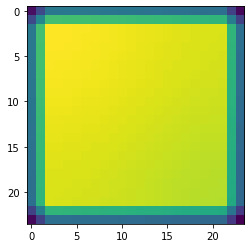

In [132]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation

interval = 200
fps = 1000/interval

fig, ax = plt.subplots()

frames = []
for i in range(100):
    lake.spread(['algae'], 2)
    frame = ax.imshow(lake.return_variable_grid('algae'))
    frames.append([frame])

res = [sum(i) for i in zip(*lake.return_variable_grid('algae'))]
print(sum(res))

#   Makes Artist Object
artist = animation.ArtistAnimation(fig, frames, interval=interval, blit=True, repeat_delay=1000)
#   Pick the Writer you want to use
gifwriter = animation.PillowWriter(fps=fps)
#   Save as gif
artist.save('spread.gif',writer=gifwriter)